# Stack Overflow Developer Survey Characterizations

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import pprint
# %pprint
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter
from sklearn.svm import LinearSVC

## Executive Summary
In this project I explore how the answers selected by respondents of the 2024 Stack Overflow Developer Survey represent each individual user. I will take as a case study the available 2024 Stack Overflow Developer Survey responses to assess the answers users provided to a group of relevant questions. Through my exploratory data analysis, I have found that developers who have a lower number of years programming as their profession tend to use generative artificiall intelligence tools more than those with a higher number of years programming professionally. However, a developer's use of artifical intelligence had little impact on the annual salary they were already earning. With the use of predictive models, I found a handful of predictors which effectively predict the salary a professional developer should earn. Additionally, I used a Linear Support Vector Classifier (SVC) which attempted to determine whether a respondent used artifcial intelligence tools in their workflow. Despite my model's higher score, there is no clear relationship between a respondent's survey responses and their use of AI tools.

## Background
Stack Overflow is an online form mainly used by developers who are looking for help with a wide range of programming problems. The scope of the questions posted on Stack Overflow can range from asking about a high-level overview about a programming paradigms, architectural patterns, and languages, all the way down to specific errors with concrete lines of code or files. Responses to these questions come from the community, and are promoted by their effectiveness, accuracy, and performance. The community sourced questions an responses led to the rapid popularity of the website, becoming the goto website when developers of all experience levels have issues while programming. In 2010, the website launched the Stack Overflow Annual Survey to gather demographics about it's users to improve advertising targeting on the website. The website continued to release surveys every year, with the number of annual respondents growing from 2,532 all the way up to 2024's total of 65,437 respondents.

## Initial Research Question
Before my exploratory data analysis, my initial research question was to find a relationship between developer's use of artificial intelligence as part of their workflow and their salary. The Developer Survey asks the respondent which tools they have used and would like to use, as well as what their current salary is. In the dataset provided by Stack Overflow, there are numerous rows of data which are missing responses to one or both questions. Due to the already low number of samples, removing all rows with missing values would result in just under 19,000 rows to perform analysis on. As a result, I amended by research question to investigate the relationships within respondents' survey answers to see if the answers they provided could predict other answers. **Hence, I would like to know the expected salary of a developer dependent on their survey responses.**

## Approach to research
In order to address my initial research question, I will study the relationships between a user's annual salary and responses to relevant questions on the survey. On the survey, each respondent is given a list of programming languages, and asked to indicate which languages they extensively used in the past year and which languages they would like to use in the coming year. The survey asks other relevant questions including: a programmer's age backet, the number of years they've been coding personally and professionally; and the type of programmer which best characterizes themselves. The main part of this project will be assessing how the various langauges, years of experience, and other factors impact their expected salary.

## Approach to research
In order to address my initial research question, I will study the relationships between a user's annual salary and responses to relevant questions on the survey. On the survey, each respondent is given a list of programming languages, and asked to indicate which languages they extensively used in the past year and which languages they would like to use in the coming year. The survey asks other relevant questions including: a programmer's age backet, the number of years they've been coding personally and professionally; and the type of programmer which best characterizes themselves. The main part of this project will be assessing how the various langauges, years of experience, and other factors impact their expected salary.

### Survey Response Data
The data from the Stack Overflow website is a `.zip` file containing two `.csv` documents, as well as a pdf of the original survey. The first `.csv` document is the data schema, relating each column title to a question from the survey. The schema is mostly accurate, but deviates when users are asked to select from a list programming languages, technologies, tools, etc. and indicate which ones they previously worked with and would like to work with. The second `.csv` file is the survey result data from the 65,437 responses, with 115 columns. The columns in the data mostly follow the columns defined in the schema, with the previously mentioned exception.

In [2]:
data = pd.read_csv('data/survey_results_public_training.csv')
data.head(5)

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,51005,51006,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","On the job training;School (i.e., University, ...",...,20.0,20.0,0.0,20.0,0.0,0.0,Appropriate in length,Easy,NaN,9.0
1,23933,23934,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,...,49.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,98814.0,9.0
2,59120,59121,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",...,5.0,15.0,15.0,15.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,NaN,3.0
3,1552,1553,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,...,50.0,0.0,0.0,30.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,83777.0,2.0
4,61241,61242,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects;Boots...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Response Data
If I run `.dropna()` on the entire dataset, the call results in a `DataFrame` with zero rows. 

In [3]:
data_no_na = data.dropna()
data_no_na

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


This means I will have to select the features I identify as being most relevant to answer my initial research question. Some of the columns I chose to include in my analysis were related to a respondent's age, number of years personally and professionally programming, the languages previously worked with, inclusion of generative AI in their workflows, and their yearly salary.

In [4]:
salary_data = data[[
    # Categorical vars which need one-hot encoding
    'Age',

    # Numeric variables
    'MainBranch',
    'YearsCode',
    'YearsCodePro',
    'WorkExp',
    'LanguageHaveWorkedWith',

    # Target variable
    'ConvertedCompYearly',
]].dropna()
salary_data.head(5)

,Age,MainBranch,YearsCode,YearsCodePro,WorkExp,LanguageHaveWorkedWith,ConvertedCompYearly
1,35-44 years old,I am a developer by profession,19,8,8.0,Bash/Shell (all shells);C;C++;Go;Haskell;Prolo...,98814.0
3,25-34 years old,I am a developer by profession,12,8,8.0,C#;PowerShell,83777.0
5,25-34 years old,I am a developer by profession,7,4,4.0,Bash/Shell (all shells);C++;HTML/CSS;JavaScrip...,65518.0
17,25-34 years old,I am a developer by profession,14,7,7.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,87841.0
24,35-44 years old,I am a developer by profession,22,16,16.0,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,216559.0


The first notable case is in the two columns recording a respondent's number of years programming, and the number of years they've been programming as part of their profession. Responses are mostly numeric, with the exception of those who chose "Less than 1 year" or "More than 50 years". To clean these two values and convert the entire column to integer values, I made the decision to convert all "Less than 1 year" responses to 0, and all "More than 50 years" responses to 51. These two values were picked because it will simplify analysis and prediction if the models work with whole years. This conclusion also motivated the decision to set all "More than 50 years" responses to 51, as I am certain that all respondents who chose that answer worked greater than or equal to 51 years, but I cannot make any conclusion as to whether or not they served 52+ years.

In [5]:
def clean_years(year):
    if year == 'Less than 1 year' or pd.isnull(year):
        return np.int64(0)
    elif year == 'More than 50 years':
        return np.int64(51)
    else:
        return np.int64(year)
    
salary_data['YearsCode'] = salary_data['YearsCode'].apply(clean_years)
salary_data['YearsCodePro'] = salary_data['YearsCodePro'].apply(clean_years)


The other notable case of cleaning is every column where respondents are asked to choose from a list of programming languages, tools, etc. To make these lists easier to work with, I ran each relevant column through a `MultiLabelBinarizer` which effectively took all unique choices from each response and one-hot encoded each unique choice as its own column in the dataframe. This way, I could easily identify all responses who picked any specific programming language.

In [40]:
def str_to_list(string):
    if isinstance(string, str):
        return string.split(';')
    return []

salary_data['LanguageHaveWorkedWith'] = salary_data['LanguageHaveWorkedWith'].apply(str_to_list)

mlb = MultiLabelBinarizer()
unique_langs_encoded = mlb.fit_transform(salary_data['LanguageHaveWorkedWith'])
lang_choice = pd.DataFrame(unique_langs_encoded, columns=mlb.classes_)
langs_encoded = pd.concat([salary_data.drop(columns='LanguageHaveWorkedWith'), lang_choice], axis=1)

list(langs_encoded.columns)

['Age',
 'MainBranch',
 'YearsCode',
 'YearsCodePro',
 'WorkExp',
 'ConvertedCompYearly']

To complete the cleaning and preprocessing, I will one-hot encode the `Age` and `MainBranch` features, as they categorize users into groups.

In [41]:
salary_data_encoded = pd.get_dummies(
    langs_encoded,
    columns=[
        'Age',
        'MainBranch'
    ],
    drop_first=True
).dropna()

list(salary_data_encoded.columns)

['YearsCode',
 'YearsCodePro',
 'WorkExp',
 'ConvertedCompYearly',
 'Age_25-34 years old',
 'Age_35-44 years old',
 'Age_45-54 years old',
 'Age_55-64 years old',
 'Age_65 years or older',
 'Age_Prefer not to say',
 'Age_Under 18 years old',
 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies']

## Exploratory Data Analysis
### Potential Response Variables
I attempted to answer my first research question by plotting a violin plot displaying a respondent's yearly salary vs. their inclusion of AI into their workflows. This chart was how I discovered that there was not a significant difference in yeary compensation between those who do an do not incorporate AI.
`ConvertedCompYearly`


<Axes: xlabel='ConvertedCompYearly', ylabel='AISelect'>

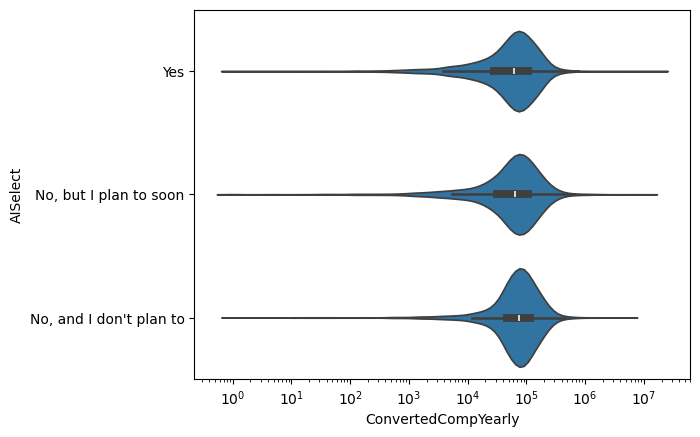

In [42]:
ai_data = data[['AISelect', 'ConvertedCompYearly']].dropna()

# Add label to indicate that the x axis is on log scale
sns.violinplot(data=ai_data, x='ConvertedCompYearly', y='AISelect', log_scale=True)


After making this discovery, I decided to investigate each attribute individually to try to find relationships between other pairs of attributes. These relationships will be discussed in the Potential Predictor Variables section of this report.



### Potential Predictor Variables
#### Age
Stack Overflow decided to categorize respondents in age brackets, rather than allowing them to respond with an exact number of years. While this initially confused me, it soon proved very useful to group respondents by these buckets, as I was able to easily draw meaningful conclusions about developers based upon which age group they fell in. A developer's age can have a great impact on their potential salary, because it is generally known that as a developer gets older, they have more time working in the industry, and hence more experience. Employers seek out those with greater experience, and are willing to compensate experienced developers handsomely. The unique aspect of age is that it does not have a direct relationship between a developer's time learning to code and programming professionally.


<Axes: xlabel='Age', ylabel='Count'>

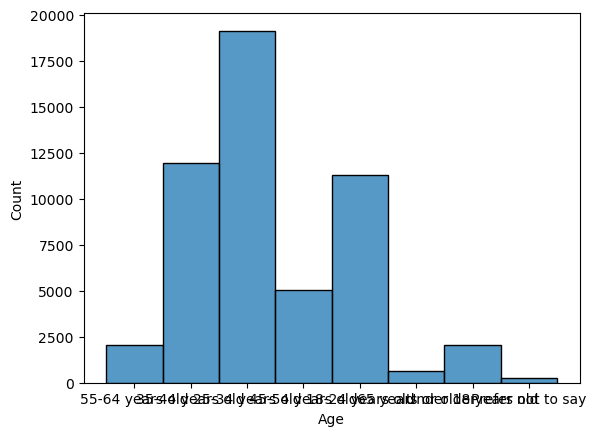

In [43]:
sns.histplot(data['Age'].dropna())


#### Years Coding in Total
The Developer Survey asks: "Including any education, how many years have you been coding in total?". This metric is useful because many people consider themselves hobbyist developers, or many respondents are still pursuing higher education and have not had the opportunity to break into the industry at the time of the survey. Additionally, since this includes time coding both inside and outside of work, it may prove to be a better indicator of one's programming proficiency.


<Axes: xlabel='YearsCode', ylabel='Count'>

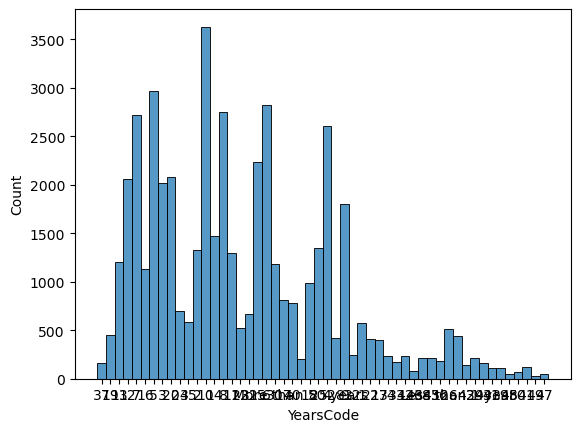

In [44]:
sns.histplot(data['YearsCode'].dropna())


#### Years Coding at Work
For this metric, the Developer Survey asks: "NOT including education, how many years have you coded professionally (as a part of your work)?" Stack Overflow's makes it clear that it wants to know only the amount of time a user spends coding as part of their profession. Note that this question does not exclude professions outside of software development, conscious of the fact that other professionals, from business, accounting, research, healthcare, etc. may include programming as part of their professional work/duties. This metric could be useful to gauge how much value coding adds to those professions.


<Axes: xlabel='YearsCodePro', ylabel='Count'>

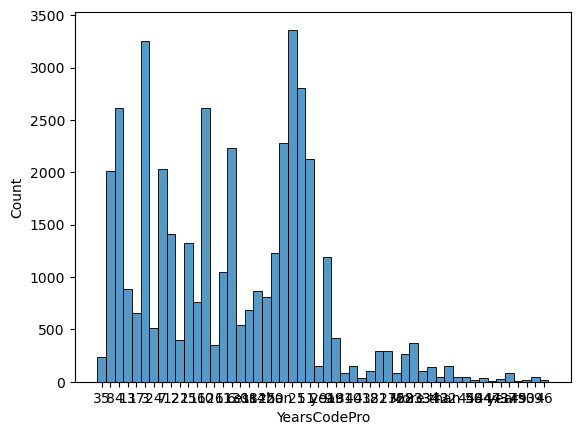

In [45]:
sns.histplot(data['YearsCodePro'].dropna())


#### Languages Extensively Worked With
This attribute is derived from one of the survey questions where respondents are asked to indicate, for this specific attribute, which programming language they either have worked extensively with in the past year or which language they desire to work with in the coming year. The dataset has three columns, one indicating extensive use in the past year, one indicating desire to use in the next year, and a third column to indicate the decision of both. While software engineering is more about the design of systems, there are trends and standards in different industries which could impact the salary a developer expects to earn if they study a particular programming language.


<BarContainer object of 49 artists>

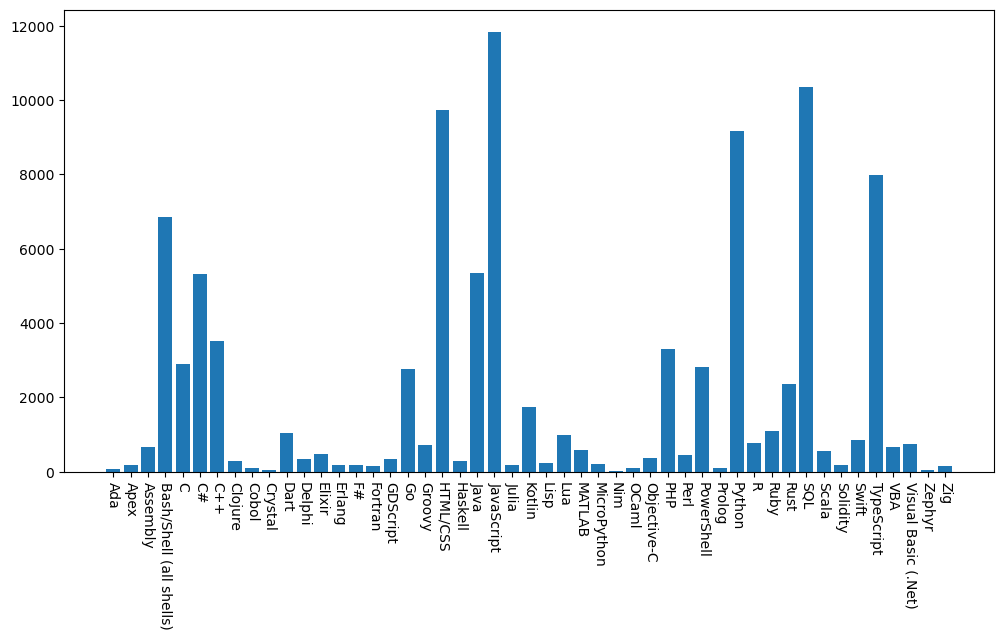

In [65]:
lang_data = data[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()

lang_data['LanguageHaveWorkedWith'] = lang_data['LanguageHaveWorkedWith'].apply(str_to_list)

mlb = MultiLabelBinarizer()
unique_langs_encoded = mlb.fit_transform(lang_data['LanguageHaveWorkedWith'])
lang_choice = pd.DataFrame(unique_langs_encoded.astype(bool), columns=mlb.classes_)
langs_encoded = pd.concat([lang_data.drop(columns='LanguageHaveWorkedWith'), lang_choice], axis=1)

list(langs_encoded.columns)
langs_encoded.drop(columns='ConvertedCompYearly').sum()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=-90)
plt.bar(langs_encoded.drop(columns='ConvertedCompYearly').columns, langs_encoded.drop(columns='ConvertedCompYearly').sum())


### Variable Relationships
#### Age and Annual Salary
To explore the relationship between age and annual salary, I will plot a violin graph with the age brackets as the cateogries, and the annual salary as the numeric variable.


<Axes: xlabel='ConvertedCompYearly', ylabel='Age'>

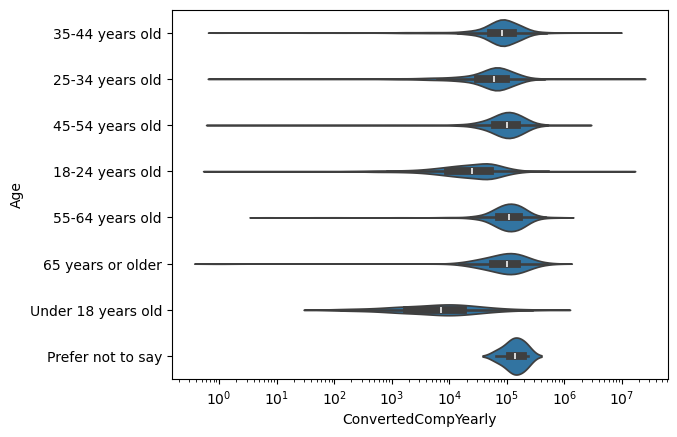

In [47]:
age_data = data[['Age', 'ConvertedCompYearly']].dropna()
sns.violinplot(data=age_data,  x='ConvertedCompYearly', y='Age', log_scale=True)


#### Years Coding and Annual Salary
To explore the relationship between total time spent coding and annual salary, I will create a scatter plot with the two numeric variables.


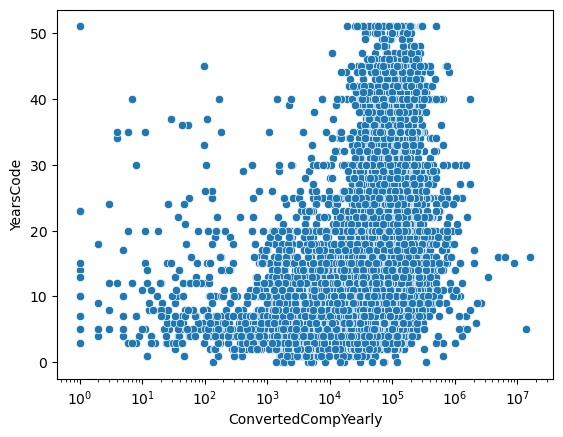

In [48]:
total_years_data = data[['YearsCode', 'ConvertedCompYearly']].dropna()
total_years_data['YearsCode'] = total_years_data['YearsCode'].apply(clean_years)
sns.scatterplot(data=total_years_data, y='YearsCode', x='ConvertedCompYearly')
plt.xscale('log')


#### Years Coding at Work and Annual Salary
Similar to the previous attribute, I will create a scatter plot of the years coding at work vs. their annual salary.


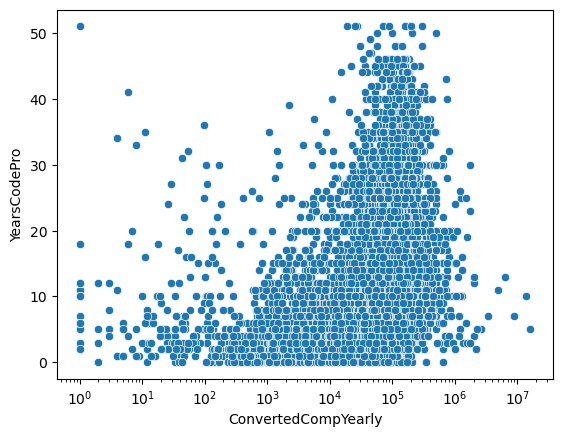

In [49]:
total_pro_years_data = data[['YearsCodePro', 'ConvertedCompYearly']].dropna()
total_pro_years_data['YearsCodePro'] = total_pro_years_data['YearsCodePro'].apply(clean_years)
sns.scatterplot(data=total_pro_years_data, y='YearsCodePro', x='ConvertedCompYearly')
plt.xscale('log')


#### Languages Extensively Worked With and Annual Salary
To explore the relationship between language extensively used in the previous year and annual salary, I will create a bar graph displaying the average salary of respondents who used a given language.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Lua'),
  Text(1, 0, 'Rust'),
  Text(2, 0, 'Visual Basic (.Net)'),
  Text(3, 0, 'Objective-C'),
  Text(4, 0, 'C'),
  Text(5, 0, 'C++'),
  Text(6, 0, 'Apex'),
  Text(7, 0, 'Ada'),
  Text(8, 0, 'JavaScript'),
  Text(9, 0, 'Ruby'),
  Text(10, 0, 'Perl'),
  Text(11, 0, 'Dart'),
  Text(12, 0, 'Prolog'),
  Text(13, 0, 'Haskell'),
  Text(14, 0, 'PowerShell'),
  Text(15, 0, 'Nim'),
  Text(16, 0, 'Swift'),
  Text(17, 0, 'Cobol'),
  Text(18, 0, 'OCaml'),
  Text(19, 0, 'Kotlin'),
  Text(20, 0, 'Crystal'),
  Text(21, 0, 'MicroPython'),
  Text(22, 0, 'VBA'),
  Text(23, 0, 'Solidity'),
  Text(24, 0, 'Fortran'),
  Text(25, 0, 'Zig'),
  Text(26, 0, 'Zephyr'),
  Text(27, 0, 'R'),
  Text(28, 0, 'F#'),
  Text(29

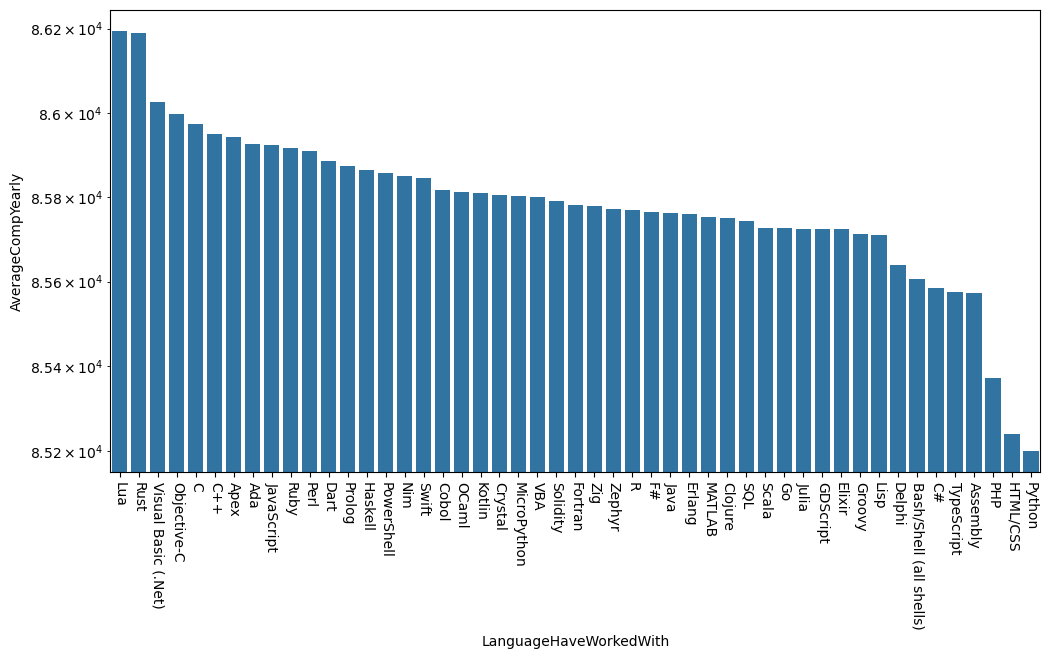

In [ ]:
lang_data = data[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()

lang_data['LanguageHaveWorkedWith'] = lang_data['LanguageHaveWorkedWith'].apply(str_to_list)

mlb = MultiLabelBinarizer()
unique_langs_encoded = mlb.fit_transform(lang_data['LanguageHaveWorkedWith'])
lang_choice = pd.DataFrame(unique_langs_encoded.astype(bool), columns=mlb.classes_)
langs_encoded = pd.concat([lang_data.drop(columns='LanguageHaveWorkedWith'), lang_choice], axis=1)

avg_comp_yearly = {}
for lang in langs_encoded.drop(columns='ConvertedCompYearly'):
    avg_comp = langs_encoded.loc[langs_encoded[lang].astype(bool), 'ConvertedCompYearly'].mean()
    avg_comp_yearly[lang] = avg_comp

avg_salary_df = pd.DataFrame(list(avg_comp_yearly.items()), columns=['LanguageHaveWorkedWith', 'AverageCompYearly'])
avg_salary_df = avg_salary_df.sort_values(by='AverageCompYearly', ascending=False)

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xticks(rotation=-90)
sns.barplot(data=avg_salary_df, x='LanguageHaveWorkedWith', y='AverageCompYearly')
# For every lang in langs_encoded.drop(columns='ConvertedCompYearly')...
# Take the lang and make it it's own column on the barplot
# then filter the dataframe for every row where <target_lang> == True
# Take average of all ConvertedCompYearly
# Make that average the value of the bar.


#### Age and Use of AI
To explore the relationship between age and use of AI, I will create a table showing the number of respondents who responded with each combination of the two choices.


<Axes: xlabel='Count', ylabel='Age'>

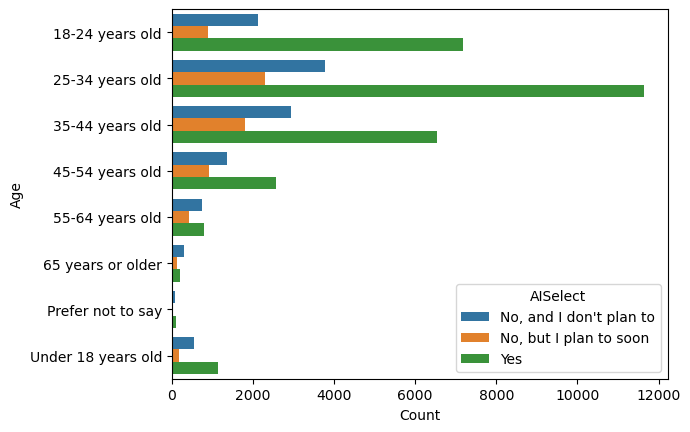

In [51]:
age_ai = data[['Age', 'AISelect']].dropna()
# age_ai['AISelect'] = age_ai['AISelect'].map({
#     'Yes': True,
#     'No, but I plan to soon': False,
#     'No, and I don\'t plan to': False,
# })
# sns.violinplot(data=age_data,  x='ConvertedCompYearly', y='Age', log_scale=True)
yes_ai = age_ai.groupby(['Age', 'AISelect']).size().reset_index(name='Count')
sns.barplot(data=yes_ai, y='Age', x='Count', hue='AISelect')


#### Years Coding and Use of AI
To explore the relationship between total time spent coding and use of AI, I will create a violin graph to illustrate the relationship.


<Axes: xlabel='YearsCode', ylabel='AISelect'>

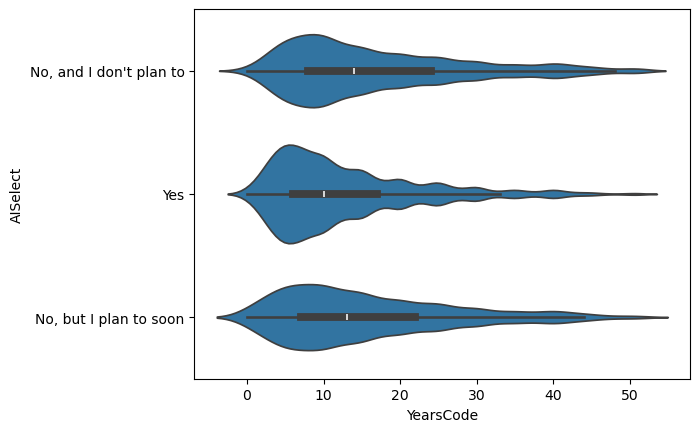

In [52]:
ai_coding = data[['YearsCode', 'AISelect']].dropna()
ai_coding['YearsCode'] = ai_coding['YearsCode'].apply(clean_years)
sns.violinplot(ai_coding, x='YearsCode', y='AISelect')


#### Years Coding at Work and Use of AI
Similar to the previous attribute, I will also create a violin graph to illustrate the relationship between years coding at work and the developer's incorporation of AI.


<Axes: xlabel='YearsCodePro', ylabel='AISelect'>

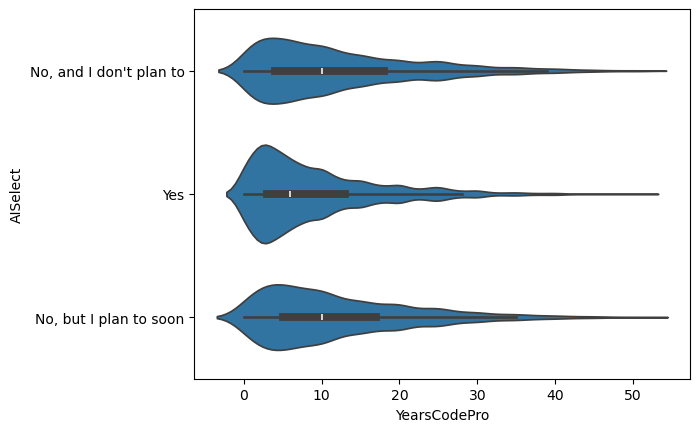

In [53]:
ai_coding_pro = data[['AISelect', 'YearsCodePro']].dropna()
ai_coding_pro['YearsCodePro'] = ai_coding_pro['YearsCodePro'].apply(clean_years)
sns.violinplot(ai_coding_pro, x='YearsCodePro', y='AISelect')


#### Languages Extensively Worked With and Use of AI
To explore the relationship between language extensively used and incorporation of AI, I will create another table showing each developer's response.


<Axes: xlabel='Used', ylabel='LanguageHaveWorkedWith'>

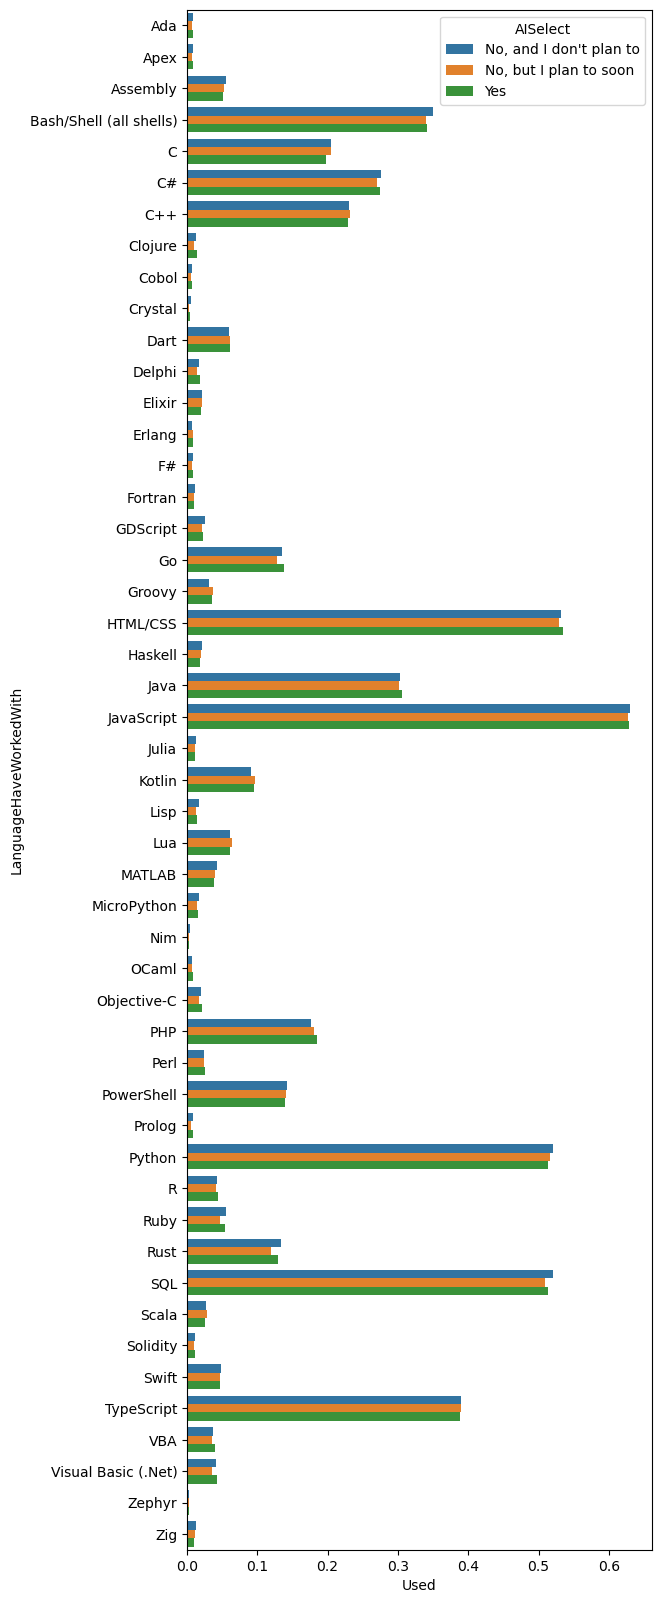

In [54]:
ai_lang = data[['LanguageHaveWorkedWith', 'AISelect']].dropna()
ai_lang['LanguageHaveWorkedWith'] = ai_lang['LanguageHaveWorkedWith'].apply(str_to_list)

unique_lang_encoded = mlb.fit_transform(ai_lang['LanguageHaveWorkedWith'])
ai_lang_choice = pd.DataFrame(unique_lang_encoded.astype(bool), columns=mlb.classes_)
ai_lang_encoded = pd.concat([ai_lang.drop(columns='LanguageHaveWorkedWith'), ai_lang_choice], axis=1)

ai_lang_encoded.dropna()

melted = ai_lang_encoded.melt(id_vars='AISelect', var_name='LanguageHaveWorkedWith', value_name='Used')

bar_data = melted.groupby(['LanguageHaveWorkedWith', 'AISelect'])['Used'].mean().reset_index()

plt.figure(figsize=(6, 20))
sns.barplot(data=bar_data, y='LanguageHaveWorkedWith', x='Used', hue='AISelect')


### Further Exploratory Analysis
#### Coding Activities and Annual Salary
One attribute I thought was initially useful for predicting annual salary, but was ultimately not able to include in my model, was the relationship between a respondent's salary and whether they programmed outside of the workplace or not. This attribute's utility comes from the fact that many companies expect candidates to have "prior programming experience" normally in the form of educational or personal projects. The hypothesis is that, if respondents spend more time outside of work programming, they are gaining more skills and becoming more proficient in the language of choice as well as software engineering skills.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'O'),
  Text(1, 0, ')'),
  Text(2, 0, ':'),
  Text(3, 0, '('),
  Text(4, 0, '’'),
  Text(5, 0, 'I'),
  Text(6, 0, 'h'),
  Text(7, 0, 'B'),
  Text(8, 0, '/'),
  Text(9, 0, 'F'),
  Text(10, 0, 'S'),
  Text(11, 0, 'g'),
  Text(12, 0, 'P'),
  Text(13, 0, 'v'),
  Text(14, 0, 'f'),
  Text(15, 0, 'd'),
  Text(16, 0, 'w'),
  Text(17, 0, 'k'),
  Text(18, 0, ';'),
  Text(19, 0, 'm'),
  Text(20, 0, 'u'),
  Text(21, 0, 'n'),
  Text(22, 0, 's'),
  Text(23, 0, 'l'),
  Text(24, 0, 't'),
  Text(25, 0, 'i'),
  Text(26, 0, 'p'),
  Text(27, 0, 'c'),
  Text(28, 0, 'a'),
  Text(29, 0, '-'),
  Text(30, 0, 'r'),
  Text(31, 0, ' '),
  Text(32, 0, 'e'),
  Text(33, 0, 'H'),
  Text(34, 0, 'y'),
  Text(35, 0, 'j'),
  Text(36, 0, 'C'),
  Text(37, 0, 'b'),
  Text(38, 0, 'o')])

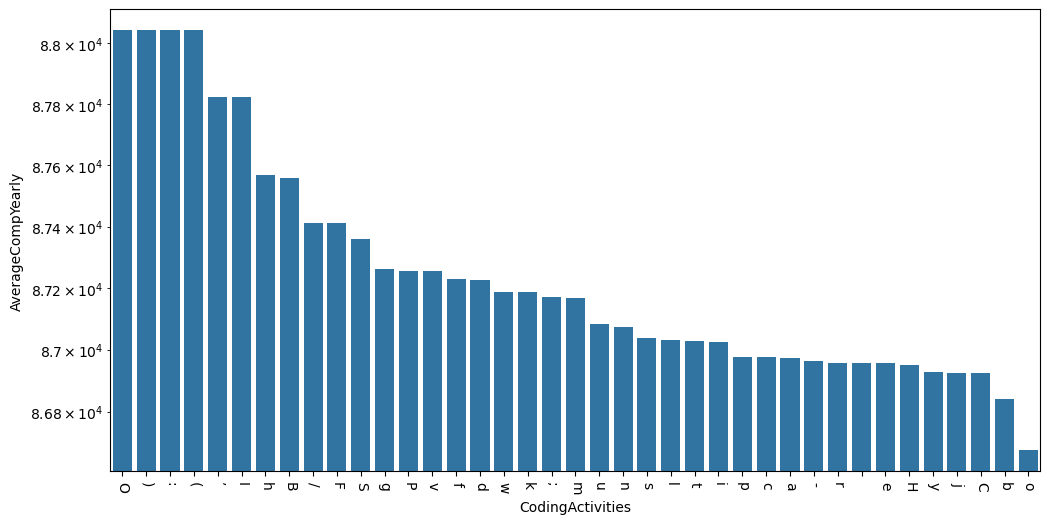

In [ ]:
salary_activities = data[['CodingActivities','ConvertedCompYearly']].dropna()
salary_activities

mlb = MultiLabelBinarizer()
unique_activities_encoded = mlb.fit_transform(salary_activities['CodingActivities'])
activity_choice = pd.DataFrame(unique_activities_encoded.astype(bool), columns=mlb.classes_)
activities_encoded = pd.concat([salary_activities.drop(columns='CodingActivities'), activity_choice], axis=1)

avg_comp_yearly = {}
for activity in activities_encoded.drop(columns='ConvertedCompYearly'):
    avg_comp = activities_encoded.loc[activities_encoded[activity].astype(bool), 'ConvertedCompYearly'].mean()
    avg_comp_yearly[activity] = avg_comp

avg_salary_df = pd.DataFrame(list(avg_comp_yearly.items()), columns=['CodingActivities', 'AverageCompYearly'])
avg_salary_df = avg_salary_df.sort_values(by='AverageCompYearly', ascending=False)

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xticks(rotation=-90)
sns.barplot(data=avg_salary_df, x='CodingActivities', y='AverageCompYearly')


#### Number of Respondents by Country
A visualization I greatly enjoyed making was plotting the number of respondents by the country they chose on the survey. After consideration, I decided not to include this attribute because in the software engineering industry and open source community, one's country of origin should not have a great impact on the languages respondents use, the age the average respondent is, and so on. The only feature this would significantly impact would be a respondent's annual salary, as the price of fair wages, cost of living, and necessities vary greatly country-by-country.


/var/folders/lm/1b6g2_5j72j1h3qmrgj124dh0000gn/T/ipykernel_6054/2222352473.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['country_centroid'] = world.to_crs(epsg=4326).centroid


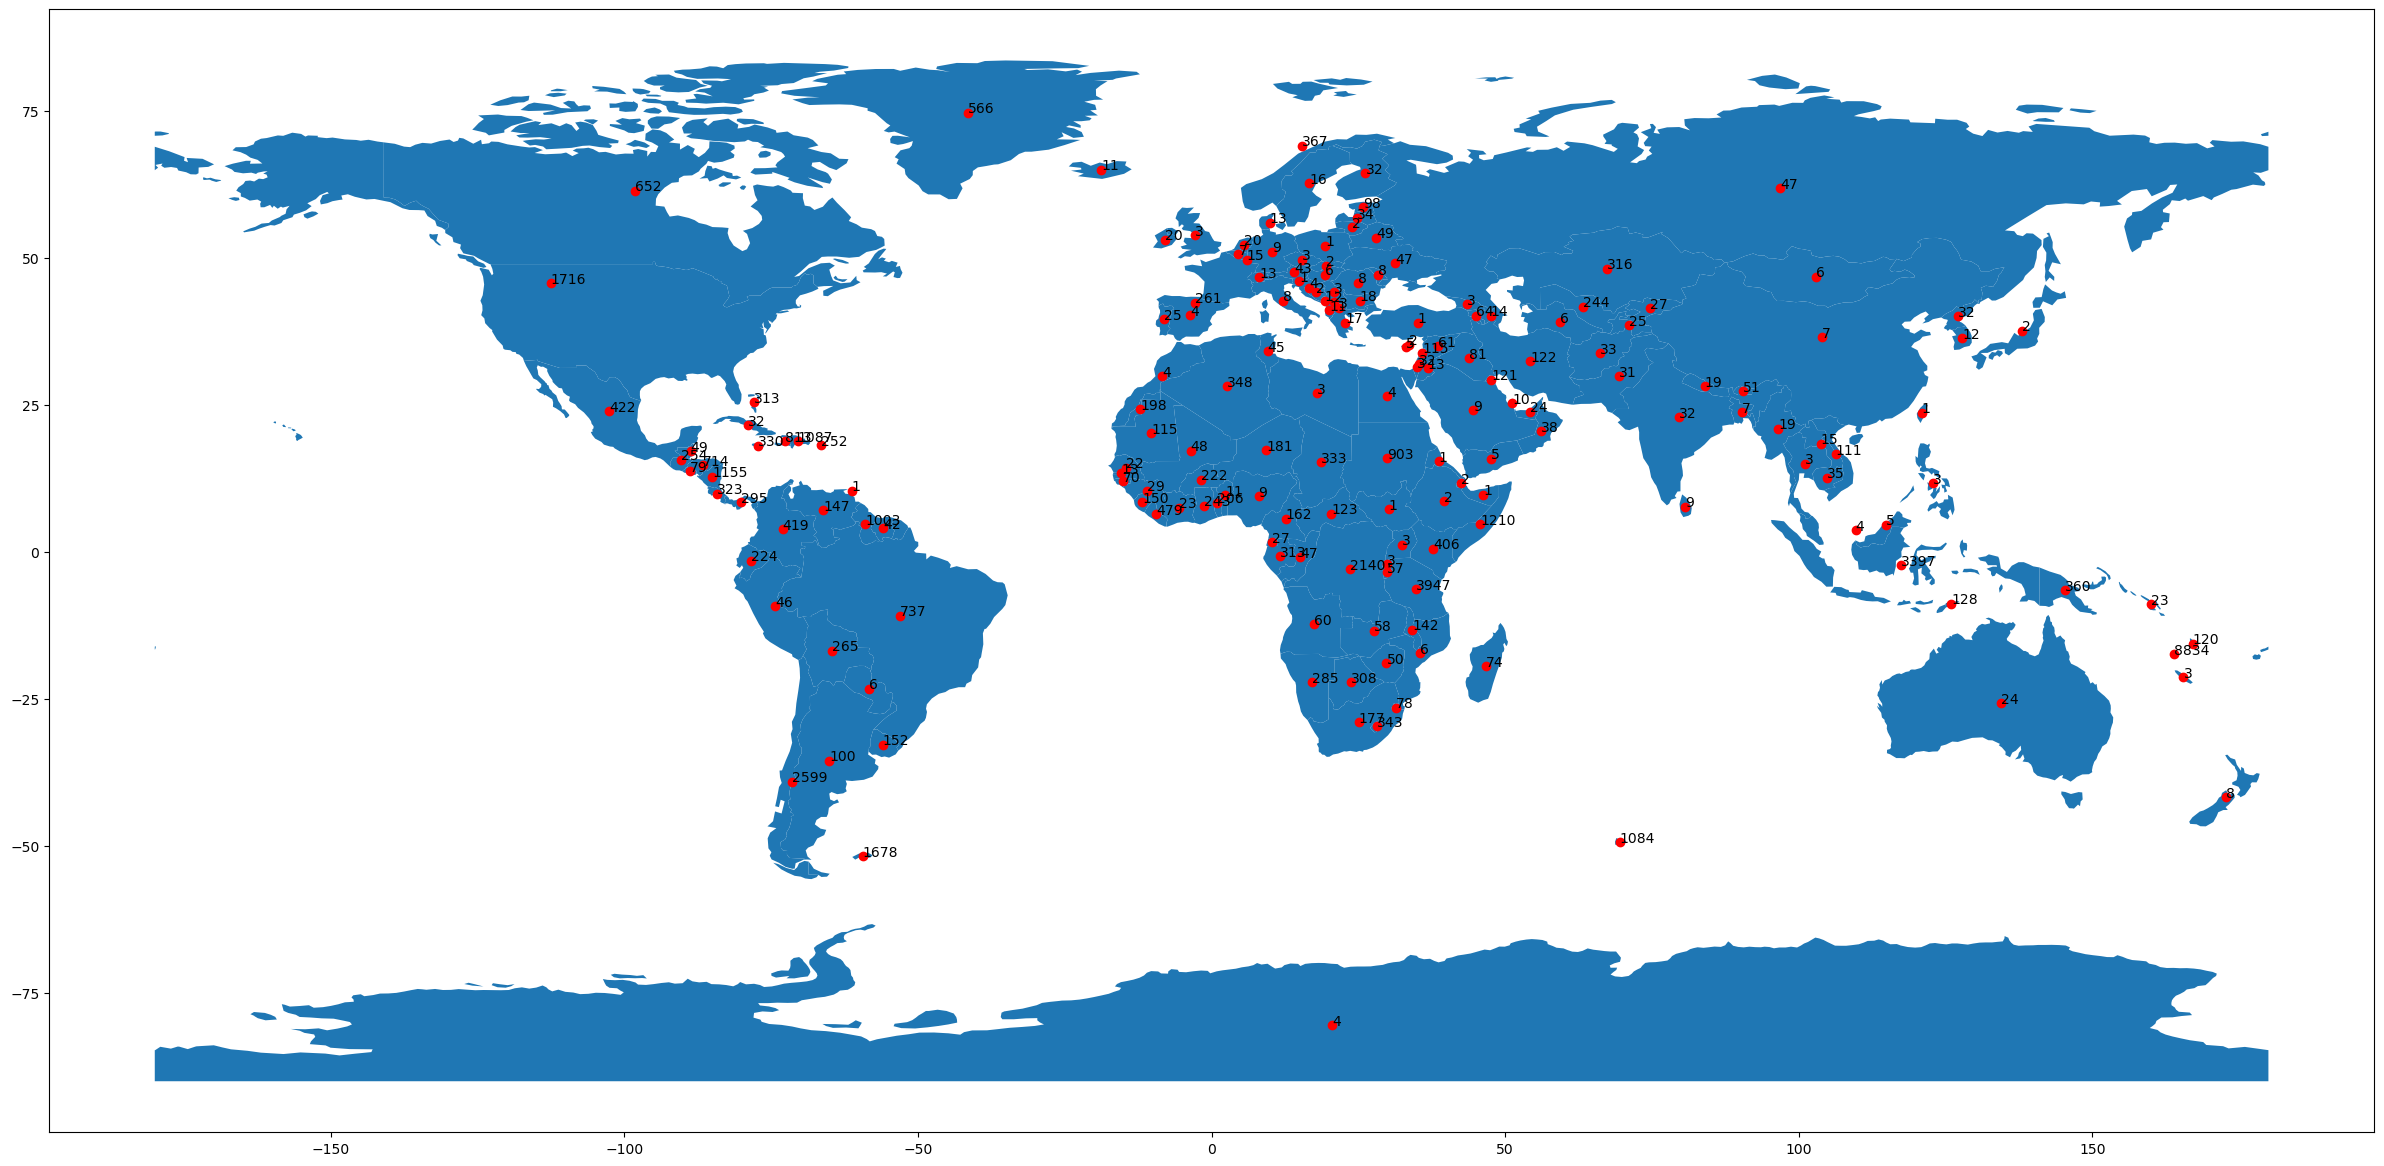

In [56]:
world = gpd.read_file('data/geopandas/ne_110m_admin_0_countries.dbf')
world['country_centroid'] = world.to_crs(epsg=4326).centroid

countries = data['Country'].dropna()
country_counts = Counter(countries)

fig, ax = plt.subplots(figsize=(30,30))
world.plot(ax=ax)
world['country_centroid'].plot(ax=ax, color='red')

for idx, label in enumerate(country_counts.values()):
    try:
        ax.annotate(label, (world['country_centroid'].x[idx], world['country_centroid'].y[idx]))
    except:
        continue


## Models
ML with Python Chapter 9



### Least Absolute Shrinkage and Selection Operator (Lasso)
For my initial research question, I am predicting a quantity, but my data contains less than 100,000 samples. Additionally, I am selecting a subset of features I deem are more important in influencing the expected annual compensation as opposed to including all features. According to the scikit-learn cheat sheet, I should use the Least Absolute Shrinkage and Selection Operator (Lasso) regression. Lasso regression works by tuning the weight of each feature to reduce the complexity of the entire model.



### Linear Support Vector Classification (SVC)
I used Linear Support Vector Classification to try to answer another research hypothesis, which is attempting to predict whether a respondent uses AI in their workflow based upon the answers they provide in the Stack Overflow Developer Survey. Linear SVC is an optimal classification method because it is effective for this dataset and the feature I am trying to predict. To answer this hypothesis, I will use my less than 65,437 samples with labeled features to categorize each sample.



## Model Results
### Predictors of Annual Salary
My model for predicting annual salary showed that a select group of features, including years of coding, years of coding at work, and work experience, greatly contributed to the expected salary of a respondent. However, every other attribute used in the training had no impact on the expected salary, as evidenced by the model's mean absolute error, mean squared error, and r2 score. This is also supported by the feature coefficients of the lasso regression model used to answer this research question.


In [57]:
# Selecting relevant columns for my model
salary_data = data[[
    # Categorical vars which need one-hot encoding
    'Age',

    # Numeric variables
    'MainBranch',
    'YearsCode',
    'YearsCodePro',
    'WorkExp',
    'LanguageHaveWorkedWith',

    # Target variable
    'ConvertedCompYearly',
]].dropna()

# Manual encoding of LanguageHaveWorkedWith
raw_langs = salary_data['LanguageHaveWorkedWith'].dropna()
unique_langs = set()
for entry in raw_langs:
    for lang in entry.split(';'):
        unique_langs.add(lang)

salary_data['LanguageHaveWorkedWith'] = salary_data['LanguageHaveWorkedWith'].apply(str_to_list)

mlb = MultiLabelBinarizer()
unique_langs_encoded = mlb.fit_transform(salary_data['LanguageHaveWorkedWith'])
lang_choice = pd.DataFrame(unique_langs_encoded, columns=mlb.classes_)
langs_encoded = pd.concat([salary_data.drop(columns='LanguageHaveWorkedWith'), lang_choice], axis=1)

list(langs_encoded.columns)

# Cleaning YearsCode and YearsCodePro
def clean_years(year):
    if year == 'Less than 1 year' or pd.isnull(year):
        return np.int64(0)
    elif year == 'More than 50 years':
        return np.int64(51)
    else:
        return np.int64(year)

# langs_encoded['YearsCode'].unique()
langs_encoded['YearsCode'] = langs_encoded['YearsCode'].apply(clean_years)
langs_encoded['YearsCodePro'] = langs_encoded['YearsCodePro'].apply(clean_years)

# One-Hot Encoding everything else
salary_data_encoded = pd.get_dummies(
    langs_encoded,
    columns=[
        'Age',
        'MainBranch'
    ],
    drop_first=True
).dropna()

# Model and Prediction
predictor_cols = list(salary_data_encoded.columns)
predictor_cols.remove('ConvertedCompYearly')
X = salary_data_encoded[predictor_cols]
y = salary_data_encoded[['ConvertedCompYearly']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

scaler = StandardScaler()
reg = linear_model.Lasso(alpha=0.1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Testing other alphas
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}
lasso_cv = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1)
lasso_cv.fit(X_train, y_train)
y_pred2 = lasso_cv.predict(X_test)
mean_absolute_error(y_test, y_pred2)
lasso_cv.best_estimator_

# Using best alpha
new_lasso = linear_model.Lasso(alpha=10000)
new_lasso.fit(X_train, y_train)

Lasso(alpha=10000)

In [58]:

# Making a custom prediction
sample = {key: False for key in list(salary_data_encoded.columns)}
sample.pop('ConvertedCompYearly')
sample['YearsCode'] = 0
sample['YearsCodePro'] = 0
sample['WorkExp'] = 0

prediction = new_lasso.predict([list(sample.values())])
prediction

array([84052.31150794])

In [59]:
# Seeing Coefficients
new_lasso.coef_.tolist()
new_lasso_wgts = {attr:wgt for attr, wgt in zip(list(salary_data_encoded.columns), new_lasso.coef_.tolist())}
new_lasso_wgts

{'YearsCode': 1257.579562500526,
 'YearsCodePro': 10405.071099939038,
 'WorkExp': 6438.887449488871,
 'ConvertedCompYearly': -0.0,
 'Ada': 0.0,
 'Apex': 0.0,
 'Assembly': 0.0,
 'Bash/Shell (all shells)': 0.0,
 'C': -0.0,
 'C#': -0.0,
 'C++': 0.0,
 'Clojure': 0.0,
 'Cobol': 0.0,
 'Crystal': -0.0,
 'Dart': -0.0,
 'Delphi': -0.0,
 'Elixir': -0.0,
 'Erlang': -0.0,
 'F#': -0.0,
 'Fortran': 0.0,
 'GDScript': 0.0,
 'Go': -0.0,
 'Groovy': -0.0,
 'HTML/CSS': -0.0,
 'Haskell': -0.0,
 'Java': -0.0,
 'JavaScript': 0.0,
 'Julia': 0.0,
 'Kotlin': 0.0,
 'Lisp': -0.0,
 'Lua': 0.0,
 'MATLAB': -0.0,
 'MicroPython': 0.0,
 'Nim': -0.0,
 'OCaml': 0.0,
 'Objective-C': -0.0,
 'PHP': 0.0,
 'Perl': -0.0,
 'PowerShell': 0.0,
 'Prolog': 0.0,
 'Python': 0.0,
 'R': 0.0,
 'Ruby': 0.0,
 'Rust': 0.0,
 'SQL': -0.0,
 'Scala': -0.0,
 'Solidity': -0.0,
 'Swift': -0.0,
 'TypeScript': -0.0,
 'VBA': 0.0,
 'Visual Basic (.Net)': 0.0,
 'Zephyr': 0.0,
 'Zig': -0.0,
 'Age_25-34 years old': 0.0,
 'Age_35-44 years old': 0.0,
 'Ag


### Predictors of AI Incorporation
I am optimistic about my model for classifying respondents regarding their use of AI in their workflows based upon their survey responses. The confusion matrix and score of my SVC model suggest that the model is heading in the right direction. Looking at the coefficients of my lasso model, every feature has some assigned, admittedly low, weight to it. This suggests that the model takes nearly every feature into account when characterizing a prediction.


In [62]:
# Selecting relevant columns
clean_data = data[[
 'MainBranch',
 'Age',
 'Employment',
 'EdLevel',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'LanguageHaveWorkedWith',
 'AISearchDevHaveWorkedWith',
 'AISelect']].dropna()

TARGET_COL = 'AISelect'

# Cleaning Data
clean_data['LanguageHaveWorkedWith'] = clean_data['LanguageHaveWorkedWith'].apply(str_to_list)

mlb = MultiLabelBinarizer()
unique_langs_encoded = mlb.fit_transform(clean_data['LanguageHaveWorkedWith'])
lang_choice = pd.DataFrame(unique_langs_encoded.astype(bool), columns=mlb.classes_)
langs_encoded = pd.concat([clean_data.drop(columns='LanguageHaveWorkedWith'), lang_choice], axis=1)

langs_encoded['AISearchDevHaveWorkedWith'] = langs_encoded['AISearchDevHaveWorkedWith'].apply(str_to_list)

unique_aisearch_encoded = mlb.fit_transform(langs_encoded['AISearchDevHaveWorkedWith'])
aisearch_choice = pd.DataFrame(unique_aisearch_encoded.astype(bool), columns=mlb.classes_)
ai_encoded = pd.concat([langs_encoded.drop(columns='AISearchDevHaveWorkedWith'), aisearch_choice], axis=1)

ai_encoded['Employment'] = ai_encoded['Employment'].apply(str_to_list)

unique_employment_encoded = mlb.fit_transform(ai_encoded['Employment'])
employment_choice = pd.DataFrame(unique_employment_encoded.astype(bool), columns=mlb.classes_)
employment_encoded = pd.concat([ai_encoded.drop(columns='Employment'), employment_choice], axis=1)

# One-Hot Encoding everything else
encoded_data = pd.get_dummies(
    employment_encoded,
    columns=[
        'MainBranch',
        'Age',
        'DevType',
        'EdLevel',
    ]
)

# Cleaning YearsCode and YearsCodePro
encoded_data['YearsCode'] = encoded_data['YearsCode'].apply(clean_years)
encoded_data['YearsCodePro'] = encoded_data['YearsCodePro'].apply(clean_years)

# Encoding AISelect
encoded_data['AISelect'] = encoded_data['AISelect'].map(
    {
        'Yes': True,
        'No, but I plan to soon': False,
        'No, and I don\'t plan to': False,
    }
)
encoded_data = encoded_data.dropna()
# list(encoded_data.columns)
obj_cols = list(encoded_data.select_dtypes(object).columns)
encoded_data[obj_cols] = encoded_data[obj_cols].astype(bool)

# Model and Prediction
pred_cols = list(encoded_data.columns)
pred_cols.remove(TARGET_COL)
y = encoded_data[[TARGET_COL]]
X = encoded_data[pred_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7758069206164583

In [63]:

# Making a prediction
sample = {key: False for key in list(encoded_data.select_dtypes(bool).columns)}
sample['YearsCode'] = 0
sample['YearsCodePro'] = 0
sample.pop('AISelect')
prediction = clf.predict([list(sample.values())])
prediction

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([ True])


### Lasso Model Results
Upon observing the coefficients produced by the lasso model regression used to predict a respondent's expected salary, I am confident in saying that there is evidence to suggest that there is a relationship between a respondent's expected annual salary and the following three attributes: total years spent coding, the total years spent coding at work, and one's number of years of professional experience. I can also confidently say that the programming language used and the age backet of the respondent do not have any significant impact on expected salary.



### Linear Support Vector Classification (SVC) Results
When looking at the results produced by the confusion matrix and the score, I can say that a respondent's Stack Overflow Developer Survey answers may be indicative of whether the respondent uses AI in their workflow or not. In light of this progress, I would like to continue refining the selection of features I use in my model in order to better understand which features are truly indicative of one's incorporation of AI into their workflow.



## Conclusions
In this report, I analyzed the relationships between respondent's salary, their age bracket, the number of years they've been coding (personally and professionally), the amount of time they've been working, and their use of AI. Despite the small sample size (for data science standards), there is evidence to suggest that there is a relationship between at least a selection of a respondent's answers and the salary they should be making. This is likely because companies derive an employee's value from their potential contributions to the company, the amount of experience they have, and their expertise. A respondent's total time spent coding, including education, for hobby, or for profession, could allow the respondent more time to learn new skills, collaborate wtih others, or practice implementing complicated design and architectural patterns and algorithms. Additionally, during an interview, a respondent's previous work experience is one of the most important factors considered by companies in the hiring process. Surprisingly, a respondent's age bracket seemed to play no significant role in determining their expected salary, which could be a sign of social progress in the software engineering industry, or could be the result of a small dataset.

As for the secondary model explored in this project, there is some evidence to suggest that a respondent's survey response could be used to predict whether they use AI in their workflows. It is interesting to see the success reported by the confusion matrix and the linear SVC score. Similar to the previous model, there is a chance that more data needs to be analyzed, and more features need to be included to gain a clearer understanding of the relationship between the responses and AI usage, if one exists.

It is likely that I could improve my analysis in several ways. Firstly, it would be interesting to analyze the data for every year Stack Overflow offered their survey. I would take the questions which were asked every year, and investigate how different relationships and patters changed throughout time. Another way I could improve my analysis is to further investigate response data based upon country. Identifying relationships based on the country of a developer could shed light upon how the social, legal, and economic environment of a developer shapes their approaches and solutions to various problems.